## Load data files

In [1]:
import pandas as pd
from sklearn.metrics import *
binary = False
n_logits = 2 if binary else 3
# for data_format in ['token', 'morph']:
#     train_df = pd.read_csv(f'../{data_format}_train.tsv', sep='\t', header=None, names=['comment', 'label'])
#     train_df['is_valid'] = False
#     test_df = pd.read_csv(f'../{data_format}_test.tsv', sep='\t', header=None, names=['comment', 'label'])
#     test_df['is_valid'] = True
#     df = pd.concat([train_df,test_df], sort=False)
#     df = df.drop_duplicates('comment')
#     if binary: df = df[df.label != 2]
#     train_df = df[df.is_valid == False].drop('is_valid', axis=1)
#     test_df = df[df.is_valid == True].drop('is_valid', axis=1)
#     train_df.to_csv(f'../{data_format}_train_clean.tsv', sep='\t', header=None, index=False)
#     test_df.to_csv(f'../{data_format}_test_clean.tsv', sep='\t', header=None, index=False)

In [2]:
import codecs
import re
from keras.utils.np_utils import to_categorical
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def load_data(filename):
    data = pd.read_csv(filename, sep='\t', header=None, names=['comment', 'label'])
    x, y = data.comment, data.label
    x = np.asarray(list(x))
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    y = to_categorical(y, n_logits)
    return x, y
    
version = ''
x_token_train, y_token_train = load_data(f'../token_train{version}.tsv')
x_token_test, y_token_test = load_data(f'../token_test{version}.tsv')
x_morph_train, y_morph_train = load_data(f'../morph_train{version}.tsv')
x_morph_test, y_morph_test = load_data(f'../morph_test{version}.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

Using TensorFlow backend.


X token train shape: (10244,)
X token test shape: (2560,)
X morph train shape: (10221,)
X morph test shape: (2555,)


In [3]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 ' תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל '
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [4]:
print(x_token_test[:5])

[' שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! '
 'איחולי הצלחה בתפקידך .' 'כל הכבוד !!!'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


In [5]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 ' תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל '
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [6]:
print(x_morph_test[:5])

[' שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! '
 'איחולי הצלחה ב תפקידך .' 'כל ה כבוד !!!'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [7]:
from keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='',
                              oov_token='UNK')
    tokenize.fit_on_texts(x_train)  # only fit on train
    print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

UNK index: 1
UNK index: 1
X token train shape: (10244, 100)
X token test shape: (2560, 100)
X morph train shape: (10221, 100)
X morph test shape: (2555, 100)


## Plot function

In [8]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics
from keras import backend as K

## Default Parameters

In [10]:
dropout_keep_prob = 0.5
embedding_size = 300
batch_size = 50
lr = 1e-4
dev_size = 0.2
loss = 'categorical_crossentropy'

## Linear - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/10
8195/8195 [==============================] - 1s 102us/step - loss: 237.3482 - accuracy: 0.4659 - val_loss: 149.8527 - val_accuracy: 0.5530
Epoch 2/10
8195/8195 [==============================] - 0s 28us/step - loss: 95.8416 - accuracy: 0.5734 - val_loss: 70.3161 - val_accuracy: 0.5486
Epoch 3/10
8195/8195 [==============================] - 0s 26us/step - loss: 50.9247 - accuracy: 0.6039 - val_loss: 46.5601 - val_accuracy: 0.6149
Epoch 4/10
8195/8195 [==============================] - 0s 26us/step - loss: 33.7374 - accuracy: 0.6103 - val_loss: 32.0858 - val_accuracy: 0.6476
Epoch 5/10
8195/8195 [==============================] - 0s 27us/step - loss: 23.4729 - accuracy: 0.6079 - val_loss: 23.7534 - val_accuracy: 0.6471
Epoch 6/10
8195/8195 [==============================] - 0s 25us/step - loss: 17.4653 - accuracy: 0.6243 - val_loss: 18.4750 - val_accuracy: 0.6418
Epoch 7/10
8195/8195 [==============================] - 0s 27us/ste

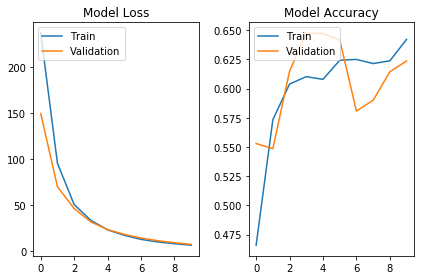

2560/2560 [==============================] - 0s 12us/step

Accurancy: 0.6324


In [11]:
num_epochs = 10

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
#model.save('word_saved_models/Linear-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [12]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2560/2560 [==============================] - 0s 7us/step


(0.632421875, 0.4241433789388442, 0.21661497484257963)

## Linear - Morph

Train on 8176 samples, validate on 2045 samples
Epoch 1/10
8176/8176 [==============================] - 0s 37us/step - loss: 249.7187 - accuracy: 0.4450 - val_loss: 175.4749 - val_accuracy: 0.5144
Epoch 2/10
8176/8176 [==============================] - 0s 27us/step - loss: 127.0595 - accuracy: 0.5375 - val_loss: 93.3526 - val_accuracy: 0.5873
Epoch 3/10
8176/8176 [==============================] - 0s 27us/step - loss: 70.0294 - accuracy: 0.5943 - val_loss: 58.4774 - val_accuracy: 0.5897
Epoch 4/10
8176/8176 [==============================] - 0s 28us/step - loss: 44.2022 - accuracy: 0.6023 - val_loss: 40.1976 - val_accuracy: 0.6460
Epoch 5/10
8176/8176 [==============================] - 0s 27us/step - loss: 31.5577 - accuracy: 0.6207 - val_loss: 30.2931 - val_accuracy: 0.6259
Epoch 6/10
8176/8176 [==============================] - 0s 28us/step - loss: 23.2278 - accuracy: 0.6115 - val_loss: 23.0225 - val_accuracy: 0.5834
Epoch 7/10
8176/8176 [==============================] - 0s 28us/ste

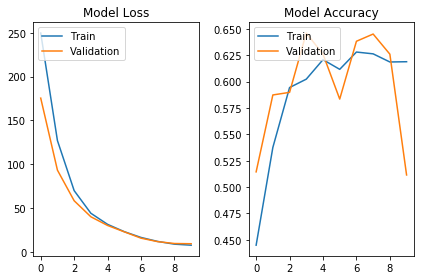

2555/2555 [==============================] - 0s 12us/step

Accurancy: 0.5112


In [13]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/Linear-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [14]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2555/2555 [==============================] - 0s 7us/step


(0.5111545988258317, 0.37606926317952927, 0.14404707263459957)

## CNN - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/5
8195/8195 [==============================] - 3s 392us/step - loss: 0.6912 - accuracy: 0.7077 - val_loss: 0.6520 - val_accuracy: 0.7252
Epoch 2/5
8195/8195 [==============================] - 2s 189us/step - loss: 0.5746 - accuracy: 0.7722 - val_loss: 0.4953 - val_accuracy: 0.8053
Epoch 3/5
8195/8195 [==============================] - 2s 184us/step - loss: 0.4030 - accuracy: 0.8528 - val_loss: 0.3945 - val_accuracy: 0.8541
Epoch 4/5
8195/8195 [==============================] - 2s 190us/step - loss: 0.2912 - accuracy: 0.9019 - val_loss: 0.3552 - val_accuracy: 0.8721
Epoch 5/5
8195/8195 [==============================] - 2s 235us/step - loss: 0.2192 - accuracy: 0.9296 - val_loss: 0.3432 - val_accuracy: 0.8785


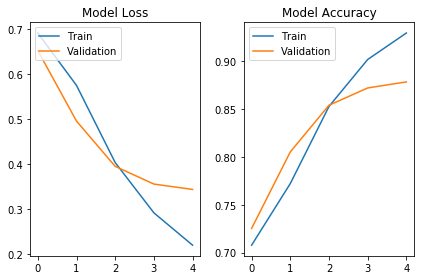

2560/2560 [==============================] - 0s 57us/step

Accurancy: 0.895


In [15]:
num_epochs = 5

# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                        batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [16]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2560/2560 [==============================] - 0s 50us/step


(0.89453125, 0.5939569315627352, 0.7659591129391413)

## CNN - Morph

Train on 8176 samples, validate on 2045 samples
Epoch 1/5
8176/8176 [==============================] - 2s 211us/step - loss: 0.6940 - accuracy: 0.7056 - val_loss: 0.6479 - val_accuracy: 0.7311
Epoch 2/5
8176/8176 [==============================] - 2s 196us/step - loss: 0.5719 - accuracy: 0.7751 - val_loss: 0.4921 - val_accuracy: 0.8181
Epoch 3/5
8176/8176 [==============================] - 2s 192us/step - loss: 0.3990 - accuracy: 0.8571 - val_loss: 0.3912 - val_accuracy: 0.8650
Epoch 4/5
8176/8176 [==============================] - 2s 195us/step - loss: 0.2966 - accuracy: 0.9015 - val_loss: 0.3535 - val_accuracy: 0.8719
Epoch 5/5
8176/8176 [==============================] - 2s 200us/step - loss: 0.2284 - accuracy: 0.9265 - val_loss: 0.3370 - val_accuracy: 0.8905


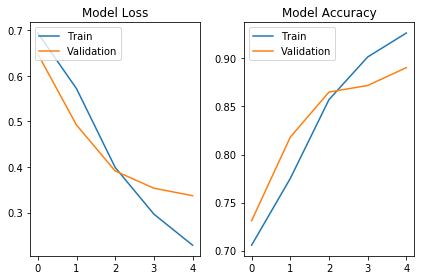

2555/2555 [==============================] - 0s 59us/step

Accurancy: 0.8939


In [17]:
# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [18]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2555/2555 [==============================] - 0s 53us/step


(0.8939334637964775, 0.5944806911471554, 0.7649806485606258)

## LSTM - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.8054 - accuracy: 0.6606 - val_loss: 0.7392 - val_accuracy: 0.6603
Epoch 2/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.7385 - accuracy: 0.6736 - val_loss: 0.7454 - val_accuracy: 0.6745
Epoch 3/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.7204 - accuracy: 0.6904 - val_loss: 0.6329 - val_accuracy: 0.7443
Epoch 4/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.5403 - accuracy: 0.8115 - val_loss: 0.4349 - val_accuracy: 0.8477
Epoch 5/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.3582 - accuracy: 0.8842 - val_loss: 0.4299 - val_accuracy: 0.8502
Epoch 6/7
8195/8195 [==============================] - 15s 2ms/step - loss: 0.2989 - accuracy: 0.9103 - val_loss: 0.3856 - val_accuracy: 0.8790
Epoch 7/7
8195/8195 [==============================] - 16s 2ms/step - loss: 0.2717 - acc

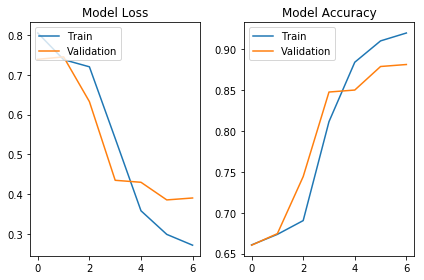

2560/2560 [==============================] - 1s 369us/step

Accurancy: 0.886


In [19]:
num_epochs = 7
lstm_units = 93

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [20]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2560/2560 [==============================] - 1s 388us/step


(0.8859375, 0.5868462736303325, 0.7462321922903217)

## LSTM - Morph

Train on 8176 samples, validate on 2045 samples
Epoch 1/7
8176/8176 [==============================] - 16s 2ms/step - loss: 0.8091 - accuracy: 0.6334 - val_loss: 0.7367 - val_accuracy: 0.6597
Epoch 2/7
8176/8176 [==============================] - 16s 2ms/step - loss: 0.7315 - accuracy: 0.6793 - val_loss: 0.7217 - val_accuracy: 0.6885
Epoch 3/7
8176/8176 [==============================] - 16s 2ms/step - loss: 0.6879 - accuracy: 0.7183 - val_loss: 0.5892 - val_accuracy: 0.7780
Epoch 4/7
8176/8176 [==============================] - 16s 2ms/step - loss: 0.4561 - accuracy: 0.8419 - val_loss: 0.4048 - val_accuracy: 0.8548
Epoch 5/7
8176/8176 [==============================] - 15s 2ms/step - loss: 0.3395 - accuracy: 0.8910 - val_loss: 0.3740 - val_accuracy: 0.8738
Epoch 6/7
8176/8176 [==============================] - 15s 2ms/step - loss: 0.2869 - accuracy: 0.9132 - val_loss: 0.3627 - val_accuracy: 0.8778
Epoch 7/7
8176/8176 [==============================] - 16s 2ms/step - loss: 0.2604 - acc

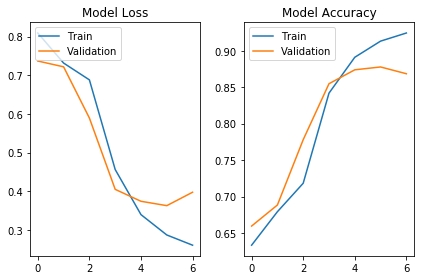

2555/2555 [==============================] - 1s 369us/step

Accurancy: 0.877


In [21]:
num_epochs = 7

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [22]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2555/2555 [==============================] - 1s 389us/step


(0.8771037181996086, 0.5823979225137207, 0.7364012532696078)

## BiLSTM - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/3
8195/8195 [==============================] - 31s 4ms/step - loss: 0.7633 - accuracy: 0.6749 - val_loss: 0.6593 - val_accuracy: 0.7316
Epoch 2/3
8195/8195 [==============================] - 30s 4ms/step - loss: 0.5482 - accuracy: 0.7900 - val_loss: 0.4583 - val_accuracy: 0.8306
Epoch 3/3
8195/8195 [==============================] - 30s 4ms/step - loss: 0.3610 - accuracy: 0.8752 - val_loss: 0.3975 - val_accuracy: 0.8536


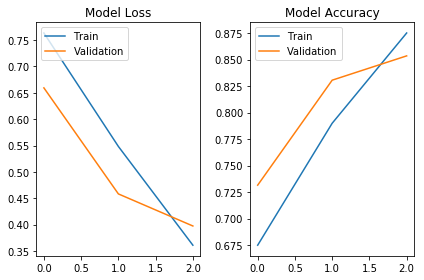

2560/2560 [==============================] - 2s 700us/step

Accurancy: 0.870


In [23]:
num_epochs = 3

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [24]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2560/2560 [==============================] - 2s 737us/step


(0.869921875, 0.5752797396216641, 0.7130189015588478)

## BiLSTM - Morph

Train on 8176 samples, validate on 2045 samples
Epoch 1/3
8176/8176 [==============================] - 31s 4ms/step - loss: 0.7492 - accuracy: 0.6824 - val_loss: 0.6342 - val_accuracy: 0.7443
Epoch 2/3
8176/8176 [==============================] - 30s 4ms/step - loss: 0.5050 - accuracy: 0.8086 - val_loss: 0.4212 - val_accuracy: 0.8430
Epoch 3/3
8176/8176 [==============================] - 30s 4ms/step - loss: 0.3457 - accuracy: 0.8834 - val_loss: 0.3745 - val_accuracy: 0.8743


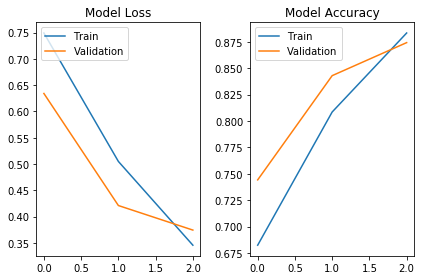

2555/2555 [==============================] - 2s 705us/step

Accurancy: 0.875


In [25]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [26]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2555/2555 [==============================] - 2s 744us/step


(0.875146771037182, 0.5782383413377721, 0.7225795919166323)

## MLP - Token

Train on 8195 samples, validate on 2049 samples
Epoch 1/6
8195/8195 [==============================] - 2s 212us/step - loss: 0.8174 - accuracy: 0.6212 - val_loss: 0.7129 - val_accuracy: 0.7062
Epoch 2/6
8195/8195 [==============================] - 2s 190us/step - loss: 0.7371 - accuracy: 0.6831 - val_loss: 0.6559 - val_accuracy: 0.7145
Epoch 3/6
8195/8195 [==============================] - 2s 188us/step - loss: 0.6923 - accuracy: 0.7052 - val_loss: 0.6204 - val_accuracy: 0.7330
Epoch 4/6
8195/8195 [==============================] - 2s 187us/step - loss: 0.6139 - accuracy: 0.7430 - val_loss: 0.5394 - val_accuracy: 0.7853
Epoch 5/6
8195/8195 [==============================] - 2s 188us/step - loss: 0.4937 - accuracy: 0.8146 - val_loss: 0.4244 - val_accuracy: 0.8355
Epoch 6/6
8195/8195 [==============================] - 2s 188us/step - loss: 0.3784 - accuracy: 0.8692 - val_loss: 0.3765 - val_accuracy: 0.8516


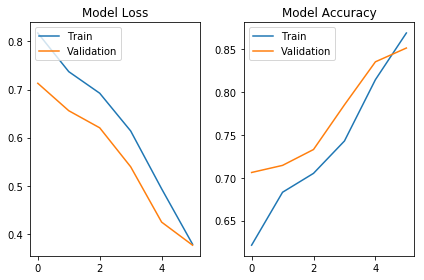

2560/2560 [==============================] - 0s 28us/step

Accurancy: 0.866


In [27]:
num_epochs = 6

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [28]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2560/2560 [==============================] - 0s 33us/step


(0.86640625, 0.5746733938992511, 0.7099587912887562)

## MLP - Morph

Train on 8176 samples, validate on 2045 samples
Epoch 1/6
8176/8176 [==============================] - 2s 213us/step - loss: 0.7860 - accuracy: 0.6660 - val_loss: 0.6963 - val_accuracy: 0.7051
Epoch 2/6
8176/8176 [==============================] - 2s 189us/step - loss: 0.7195 - accuracy: 0.6953 - val_loss: 0.6714 - val_accuracy: 0.7174
Epoch 3/6
8176/8176 [==============================] - 2s 189us/step - loss: 0.6645 - accuracy: 0.7188 - val_loss: 0.5946 - val_accuracy: 0.7604
Epoch 4/6
8176/8176 [==============================] - 2s 187us/step - loss: 0.5628 - accuracy: 0.7642 - val_loss: 0.4820 - val_accuracy: 0.8132
Epoch 5/6
8176/8176 [==============================] - 2s 189us/step - loss: 0.4275 - accuracy: 0.8359 - val_loss: 0.3993 - val_accuracy: 0.8416
Epoch 6/6
8176/8176 [==============================] - 2s 187us/step - loss: 0.3167 - accuracy: 0.8893 - val_loss: 0.3596 - val_accuracy: 0.8621


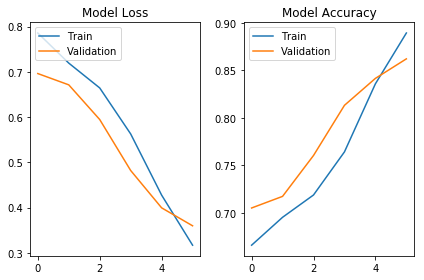

2555/2555 [==============================] - 0s 29us/step

Accurancy: 0.870


In [29]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [30]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

2555/2555 [==============================] - 0s 33us/step


(0.8704500978473582, 0.5758715480008956, 0.7158897404877168)